<center> <font size='6' font-weight='bold'> Model Part </font> </center>  
<center> <i> Projet Navee</i> </center>
<center> <i> Tony WU </i> </center>  
  
  
<img src=ressources/image_couverture.jpg>

# Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime
import io

# Tensorflow
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

/Users/Tony/opt/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Tony/opt/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Tony/opt/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Tony/opt/anaconda3/envs/ML/lib/python3.7/s

# Creation of the Neural Network

In [3]:
print(tf.__version__)

1.13.1


Should be `2.1.0` or higher.

# Tensorboard callback configuration

We'll store all the logs in a directory named `logs`.  
In this folder, we'll have subfolders, each named according to what kind of data it stores. For instance, the line below stores scalars values (such as accuracy and loss with respect to epochs).

In [4]:
logdir_scalars = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir_scalars)

Run `tensorboard --logdir logs` in Terminal to launch Tensorboard.

# Loading dataset

The following lines make sure the given directory exists.

In [11]:
data_path = '101_ObjectCategories'

assert os.path.isdir(data_path), 'Dataset not found 👎🏻'
print ('Dataset found 🤙🏻')

Dataset found 🤙🏻


## Some useful functions

In [42]:
def get_data(data_path, img_size, batch_size, validation_split = 0.2, **kwargs):
    '''Given a directory containing all the images stored in folders named with the corresponding label,
    this function returns two data generators object.
    
    Inputs:
        - data_path = string
        - img_size = 2-tuple of the images' dimensions
        - batch_size = size of the batch (please input power of 2 for more efficiency)
        - validation_split = float between 0 and 1 that gives the percentage allocated to the validation set
        - **kwargs = optional dictionary which contains arguments for data augmentation
        
    Outputs:
        - ImageDataGenerator object
    '''
    
    datagen = ImageDataGenerator(rescale=1./255, **kwargs)
    
    train_generator = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=32,
        class_mode='categorical',
        subset = 'training')

    validation_generator = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=32,
        class_mode='categorical',
        subset = 'validation')
    
    return train_generator, validation_generator

In [43]:
def show_img(data_gen, batch_idx, idx):
    ''''Display the prompted image with MatPlotLib.
    
    Inputs:
        - data_gen = a generator returned by get_data for instance
        - imgbatch_idx = the index of the batch
        - idx = the index of the image inside the selected batch
        
    Outputs:
        - an ImageDataGenerator object
    '''
    
    
    plt.imshow(data_gen[batch_idx][0][idx])
    return

In [54]:
def show_label(data_gen, batch_idx, idx):
    ''''Returns the label of the prompted image.
    
    Inputs:
        - data_gen = a generator returned by get_data for instance
        - imgbatch_idx = the index of the batch
        - idx = the index of the image inside the selected batch
        
    Outputs:
        - a string
    '''
    
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    
    return labels[np.argmax(data_gen[batch_idx][1][idx])]

## Some examples

In [55]:
img_size = (120, 120)
batch_size = 32

In [56]:
train_generator, validation_generator = get_data(data_path, img_size, batch_size, validation_split = 0.2)

Found 9144 images belonging to 102 classes.
Found 0 images belonging to 102 classes.


In [57]:
nb_batches = len(train_generator)
print(f'nb_batches = {nb_batches}')

nb_batches = 286


'soccer_ball'

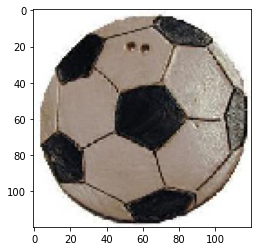

In [58]:
batch_idx = np.random.randint(0, nb_batches)
idx = np.random.randint(0, len(train_generator[0][0]))

show_img(train_generator, batch_idx, idx)
show_label(train_generator, batch_idx, idx)